# Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

In [2]:
img = Image.open('./sad.jpg')
imgX, imgY = img.size[0], img.size[1]

In [3]:
n = 50
step = 5

# Grayscale

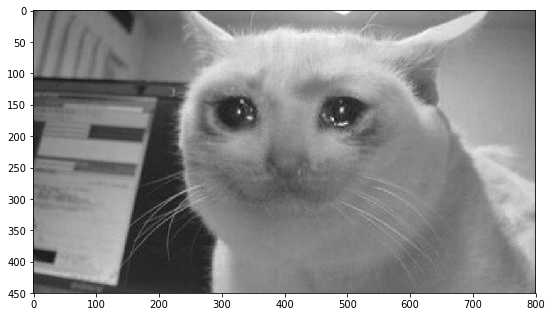

In [4]:
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

In [5]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

In [6]:
U, sigma, V = np.linalg.svd(imgmat)

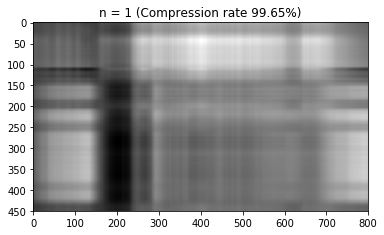

In [7]:
reconstimg = np.matrix(U[:, :2]) * np.diag(sigma[:2]) * np.matrix(V[:2, :])
plt.imshow(reconstimg, cmap='gray')
compression = (imgX + 1 + imgY) / (imgX * imgY)
compression *= 100
title = "n = 1 (Compression rate {0:.2f}%)".format(100 - compression)
plt.title(title)
plt.show()

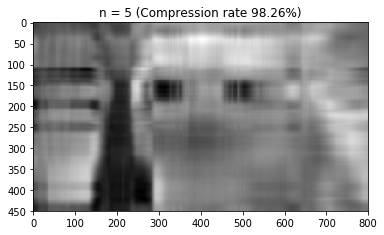

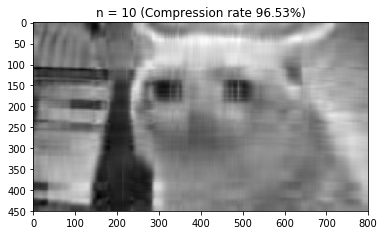

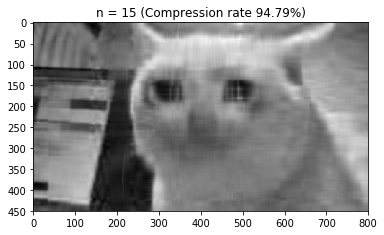

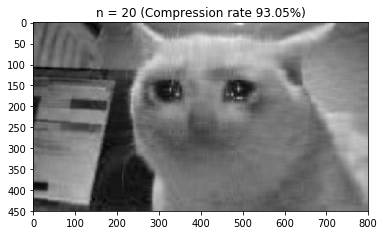

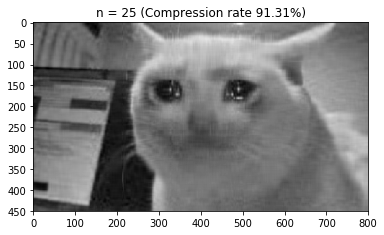

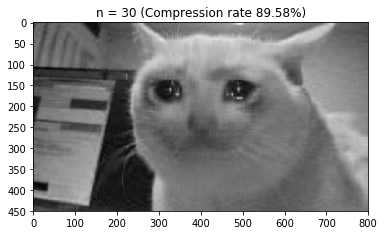

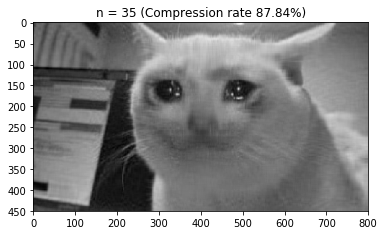

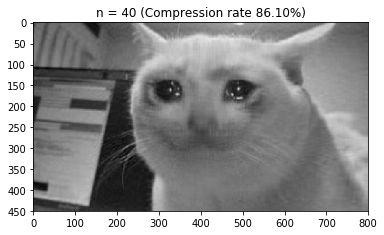

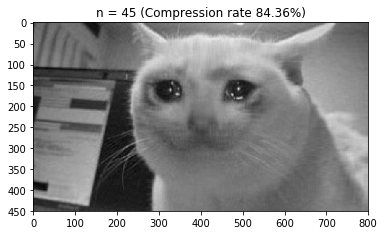

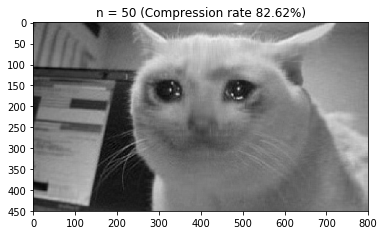

In [8]:
for i in range(5, n + 1, step):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    compression = ((imgX * i) + i + (imgY * i)) / (imgX * imgY)
    compression *= 100
    title = "n = {0} (Compression rate {1:.2f}%)".format(i, 100 - compression)
    plt.title(title)
    plt.show()

# RGB

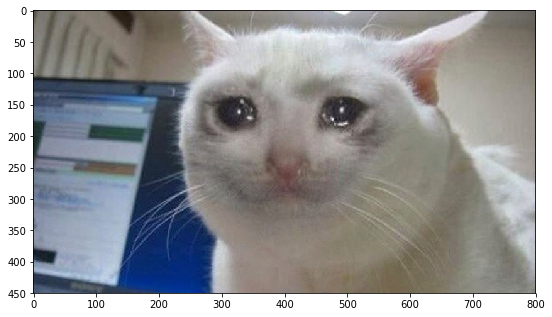

In [9]:
imgrgb = img.convert('RGB')
plt.figure(figsize=(9, 6))
plt.imshow(imgrgb);

In [10]:
imgR = np.empty((imgX, imgY))
imgG = np.empty((imgX, imgY))
imgB = np.empty((imgX, imgY))

for i in range(imgX):
    for j in range(imgY):
        r, g, b = imgrgb.getpixel((i, j))
        imgR[i][j] = r
        imgG[i][j] = g
        imgB[i][j] = b
        
imgR = np.matrix(imgR)
imgG = np.matrix(imgG)
imgB = np.matrix(imgB)

In [11]:
UR, sigmaR, VR = np.linalg.svd(imgR)
UG, sigmaG, VG = np.linalg.svd(imgG)
UB, sigmaB, VB = np.linalg.svd(imgB)

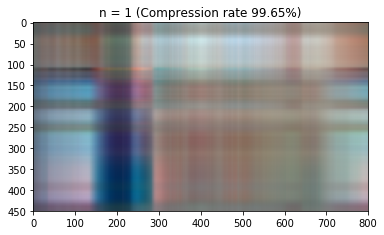

In [12]:
reconstimgR = np.matrix(UR[:, :2]) * np.diag(sigmaR[:2]) * np.matrix(VR[:2, :])
reconstimgG = np.matrix(UG[:, :2]) * np.diag(sigmaG[:2]) * np.matrix(VG[:2, :])
reconstimgB = np.matrix(UB[:, :2]) * np.diag(sigmaB[:2]) * np.matrix(VB[:2, :])

imgR = Image.fromarray(np.uint8(reconstimgR))
imgG = Image.fromarray(np.uint8(reconstimgG))
imgB = Image.fromarray(np.uint8(reconstimgB))
###
imgR = imgR.transpose(Image.ROTATE_270)
imgR = imgR.transpose(Image.FLIP_LEFT_RIGHT)
imgG = imgG.transpose(Image.ROTATE_270)
imgG = imgG.transpose(Image.FLIP_LEFT_RIGHT)
imgB = imgB.transpose(Image.ROTATE_270)
imgB = imgB.transpose(Image.FLIP_LEFT_RIGHT)
###

reconstimgRGB = Image.merge("RGB", (imgR, imgG, imgB))
plt.imshow(reconstimgRGB)
compression = (imgX + 1 + imgY) / (imgX * imgY)
compression *= 100
title = "n = 1 (Compression rate {0:.2f}%)".format(100 - compression)
plt.title(title)
plt.show()

In [ ]:
for i in range(5, n + 1, step):
    reconstimgR = np.matrix(UR[:, :i]) * np.diag(sigmaR[:i]) * np.matrix(VR[:i, :])
    reconstimgG = np.matrix(UG[:, :i]) * np.diag(sigmaG[:i]) * np.matrix(VG[:i, :])
    reconstimgB = np.matrix(UB[:, :i]) * np.diag(sigmaB[:i]) * np.matrix(VB[:i, :])

    imgR = Image.fromarray(np.uint8(reconstimgR))
    imgG = Image.fromarray(np.uint8(reconstimgG))
    imgB = Image.fromarray(np.uint8(reconstimgB))
    ###
    imgR = imgR.transpose(Image.ROTATE_270)
    imgR = imgR.transpose(Image.FLIP_LEFT_RIGHT)
    imgG = imgG.transpose(Image.ROTATE_270)
    imgG = imgG.transpose(Image.FLIP_LEFT_RIGHT)
    imgB = imgB.transpose(Image.ROTATE_270)
    imgB = imgB.transpose(Image.FLIP_LEFT_RIGHT)
    ###
    
    reconstimgRGB = Image.merge("RGB", (imgR, imgG, imgB))
    plt.imshow(reconstimgRGB)
    compression = ((imgX * i) + i + (imgY * i)) / (imgX * imgY)
    compression *= 100
    title = "n = {0} (Compression rate {1:.2f}%)".format(i, 100 - compression)
    plt.title(title)
    plt.show()